Import Stuff

In [173]:


from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from hdbscan import HDBSCAN
from umap import UMAP

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer

# from datetime import datetime
from textblob import TextBlob
from textblob_de import TextBlobDE

import pickle
import importlib
import functions

from wordcloud import WordCloud

import matplotlib.pyplot as plt

# from datasets import load_dataset
# from datasets import Dataset
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments





In [103]:
from functions import *
importlib.reload(functions)

file_path = "C:/Users/Jacob/OneDrive/uni/MA WiSoz/Semester III/Computational Social Sciences/foPra/data/"

# Load the DataFrame from a pickle file
df_manifesto = pd.read_pickle('data\df_manifesto.pkl') 
coding_list = pd.read_pickle('data/coding_list.pkl')
topics = pd.read_pickle('topics.pkl') 


Edit Text documents

In [3]:
lemmatizer = WordNetLemmatizer()

defining different models
    

In [5]:
embedding_model_en = "all-MiniLM-L6-v2"
embedding_model_multilingual1 = "paraphrase-multilingual-mpnet-base-v2"
embedding_model_multilingual2 = "distiluse-base-multilingual-cased-v1"
embedding_model_manifestoberta = "manifesto-project/manifestoberta-xlm-roberta-56policy-topics-sentence-2024-1-1"

In [6]:
representation_model = KeyBERTInspired()
cluster_model = KMeans(n_clusters=30)

In [7]:
umap_model = UMAP(
    n_neighbors=30, 
    n_components=5, 
    min_dist=0.1, 
    metric='cosine', 
    random_state=77
    )

In [ ]:
hdbscan_model = HDBSCAN(
    min_cluster_size=30, 
    # min_samples=10,
    metric='cosine', 
    prediction_data=True
    )



In [7]:
seed_topic_list = [
    ["steuern senken",
    "ausgaben erhöhen",
    "steuersenkung",
    "schuldenbremse reformieren",
    "schuldenbremse lockern",
    "schuldenbremse aussetzen",
    "schuldenbremse abschaffen",
    "investition in die zukunft" 
    ],
    ["ausgaben kürzen",
    "schuldenkrise", 
    "schuldenlast",
    "sparen",
    "haushaltssanierung",
    "haushaltssicherung",
    "haushaltskonsolidierung",
    "schuldenbremse beibehalten"]]

Initialisiere und trainiere das BERTopic-Modell


In [184]:
# Load the topics from a pickle file
topics = pd.read_pickle('topics.pkl')

# Load the probabilities from a pickle file
probs = pd.read_pickle('probs.pkl')

#df_manifesto["topic"] = topics


In [185]:
topic_model = BERTopic.load(file_path)

No sentence-transformers model found with name manifesto-project/manifestoberta-xlm-roberta-56policy-topics-sentence-2024-1-1. Creating a new one with mean pooling.
Some weights of XLMRobertaModel were not initialized from the model checkpoint at manifesto-project/manifestoberta-xlm-roberta-56policy-topics-sentence-2024-1-1 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025-03-25 19:44:03,199 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model. If you want to also load in an embedding model, make sure to use `BERTopic.load(my_model, embedding_model=my_embedding_model)`.


In [16]:

# Ensure the 'text' column contains only strings and handle NaN values
df_manifesto["text"] = df_manifesto["text"].astype(str).fillna("")

topic_model = BERTopic(
    language="multilingual"
    , n_gram_range=(1,3)
    , min_topic_size=20
    # , top_n_words=20
    , representation_model=representation_model
    , embedding_model=embedding_model_multilingual2
    , umap_model=umap_model
    , hdbscan_model=hdbscan_model
    # , seed_topic_list=seed_topic_list
    )

#topic_model = BERTopic(nr_topics=100, calculate_probabilities=True, embedding_model="all_MiniLM-L6-v2")
topics, probs = topic_model.fit_transform(df_manifesto["text"])



In [182]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,69009,-1_wollen wir_wir wollen_wir_wir werden,"[wollen wir, wir wollen, wir, wir werden, gese...",NaN
1,0,8386,0_kindergeld_familien_familie_für alle,"[kindergeld, familien, familie, für alle, kind...",NaN
2,1,4059,1_österreich ist_österreich in_in österreich_ö...,"[österreich ist, österreich in, in österreich,...",NaN
3,2,2691,2_krankenhäusern_krankenhäuser_patientinnen un...,"[krankenhäusern, krankenhäuser, patientinnen u...",NaN
4,3,2160,3_geschlechtergerechtigkeit_die gleichberechti...,"[geschlechtergerechtigkeit, die gleichberechti...",NaN
...,...,...,...,...,...
220,219,21,219_untrennbar zusammen beides_untrennbar zusa...,"[untrennbar zusammen beides, untrennbar zusamm...",NaN
221,220,21,220_verkehrspolitik övpinitiativen für_övp ini...,"[verkehrspolitik övpinitiativen für, övp initi...",NaN
222,221,20,221_petitionsrecht wollen wir_das petitionsrec...,"[petitionsrecht wollen wir, das petitionsrecht...",NaN
223,222,20,222_für jugendliche drogenabhängige_illegalem ...,"[für jugendliche drogenabhängige, illegalem dr...",NaN


In [52]:
# Save the topics to a pickle file
with open('topics.pkl', 'wb') as f:
	pickle.dump(topics, f)

# Save the probabilities to a pickle file
with open('probs.pkl', 'wb') as f:
	pickle.dump(probs, f)

In [ ]:

# Method 1 - safetensors
topic_model.save(file_path, serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model_multilingual2)

# Method 2 - pytorch
#topic_model.save(file_path, serialization="pytorch", save_ctfidf=True, save_embedding_model=embedding_model)

# Method 3 - pickle
#topic_model.save("bertopic_model.pkl")



In [233]:
df_manifesto["topic"] = topics
topic_list =[
    9,
    # 38,
    34, 
    69, 
    101]

In [105]:
df_manifesto.rename(columns={"label": "category"}, inplace=True)

In [ ]:
# Filter only relevant codes
df_spendings = df_manifesto[df_manifesto["cmp_code"].isin([
    303,
    401,
    # 411, 
    409, 
    414,
    103.2,
    402,
    504,
    505
    # 506,
    # 507,
]) | df_manifesto["topic"].isin(topic_list)
]

In [251]:
# Map policy codes to labels
label_map = {
    # 411: 0, 
    409: 1,
    # 401: 1,
    # 303: 1,
    414: 2,
    # 103.2: 0,
    # 504: 0,
    # 505: 1,
    # 506: 0,
    # 507: 1,
    }  # 0 = expansion, 1 = austerity
    
df_manifesto["label"] = df_manifesto["cmp_code"].map(label_map)
# df_spendings["label"] = df_spendings["cmp_code"].map(label_map)

In [252]:
def apply_labels(df, topic, code, policy, country="both"):
    df_labeled = df[
    (df["topic"].isin(topic)) & 
    (df["cmp_code"].isin(code))
    ]

    if country != "both":
        new_df_labeled = df_labeled.loc[df_labeled["country"] == country]
        new_df_labeled["label"] = policy
        return new_df_labeled
    else:
        df_labeled["label"] = policy
        return df_labeled

In austrian manifestos 412 controlled economy signifies tax relief for riches, in germany its taxing the rich

In [253]:

df_topic =df_manifesto[df_manifesto["topic"].isin(topic_list)]

df_exp = apply_labels(df_manifesto, topic_list, [501, 502, 503, 504, 506, 701, 413],1)
df_exp2 = apply_labels(df_manifesto, [9], [412],1,country="AU") 

df_contr = apply_labels(
    df_manifesto, 
    topic_list, 
    [505, 
     507,
     109,
     410,
     305,
     204,
     203,
     202.4,
     110,
     108
    #  605, # tax evasion
    #  605.1 # tax evasion
     ]
    ,2)

df_contr2 = apply_labels(df_manifesto, [34,69], [303,403],2) # check if 101 fits
df_contr3 = apply_labels(df_manifesto, [9], [412],2,country="DE")


df_new_labels = pd.concat([df_exp, df_exp2, df_contr, df_contr2, df_contr3], ignore_index=False)

In [254]:
df_manifesto.loc[df_new_labels.index, 'label'] = df_new_labels['label']

check topic 101 and see if fits

In [255]:
# ambiguous results: label by hand later
label_by_hand1 = apply_labels(df_manifesto, topic_list, [107, 408, 304],"X")
label_by_hand2 = apply_labels(df_manifesto, [9], [401,402,403],"X")
label_by_hand = pd.concat([label_by_hand1, label_by_hand2], ignore_index=False)

In [ ]:
df_explore = apply_labels(
    df_manifesto, 
    [34,
    #  69,
     101,
    #  9
     ], 
    [301],
    1)

In [231]:
df_explore = apply_labels(df_manifesto, [9], [303],1)

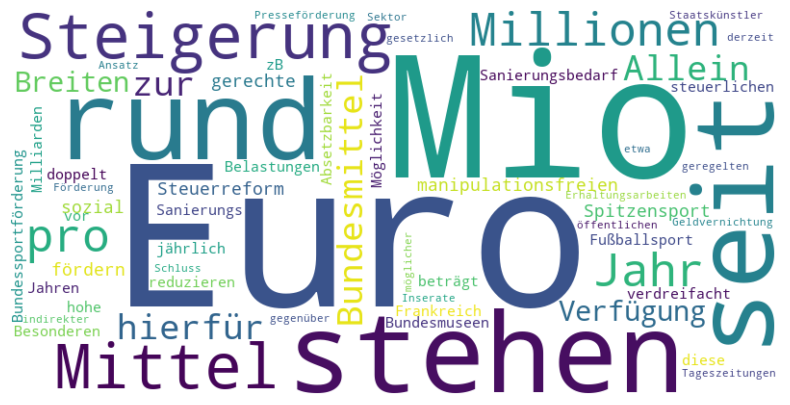

In [196]:
from wordcloud import STOPWORDS

# Filter the dataframe for the specified conditions
filtered_df = apply_labels(df_manifesto, topic_list, [502],0)

# Combine all text into a single string
text = " ".join(filtered_df["text"].dropna())

# Generate the word cloud
# Add German stopwords to the default stopwords
german_stopwords = set(STOPWORDS).union({"und", "wer", "der", "die", "das", "ist", "wir", "mit", "den", "ein", "eine", "zu", "im", "auf", "für", "von", "auch", "nicht", "in", "des", "sich", "dass", "an", "als", "es", "am", "dem", "oder", "so", "aus", "bei", "nur", "mehr", "durch", "werden", "kann", "muss", "aber", "noch", "um", "einen", "hat", "nach", "wie", "über", "man", "einer", "haben", "alle", "sehr", "schon", "wenn", "keine", "keinen", "keinem", "keiner"})

# Generate the word cloud without German stopwords
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=german_stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [195]:
# Filter the dataframe for the specified conditions
# filtered_df = df_manifesto[(df_manifesto["cmp_code"].isin([605, 605.1])) & (df_manifesto["topic"] == 9)]

# Count the number of statements per party
party_distribution = filtered_df["party"].value_counts()

# Display the party distribution
print(party_distribution)

party
GREENS_DE    4
FPÖ          2
LEFT         1
ÖVP          1
GREENS_AU    1
Name: count, dtype: int64


In [96]:
df_unlabeled = df_topic[df_topic["label"].isna()]
df_unlabeled = df_unlabeled.drop(columns=['description_md'])
# df_unlabeled.insert(2, 'label', df_unlabeled['label'])
df_unlabeled.insert(1, 'label', df_unlabeled.pop('label'))

In [256]:
label_by_hand["sentiment"] = label_by_hand["text"].apply(lambda x: TextBlobDE(x).sentiment.polarity)

label_by_hand = label_by_hand.drop(columns=['description_md'])
# df_unlabeled.insert(2, 'label', df_unlabeled['label'])
label_by_hand.insert(1, 'label', label_by_hand.pop('label'))


In [257]:


df_manifesto.to_pickle('data/df_manifesto_final.pkl')
# df_spendings.to_pickle('data/df_spendings_final.pkl')
label_by_hand.to_csv('data/df_spendings_unlabeled.csv', sep=';', index=True, encoding='utf-8-sig')
# df_no_label.to_csv('data/Unlabeled.csv', sep=';', index=True, encoding='utf-8-sig')

In [ ]:

# Erstelle das `topics_over_time`-Objekt
topics_over_time = topic_model.topics_over_time(df_manifesto["text"], df_manifesto["date"])
#topic_model = BERTopic(representation_model=KeyBERTInspired())


In [ ]:
# Save topics_over_time to a file
with open("topics_over_time.pkl", "wb") as f:
    pickle.dump(topics_over_time, f)